In [17]:
# Taken from https://scikit-learn.org/stable/auto_examples/manifold/plot_manifold_sphere.html#sphx-glr-auto-examples-manifold-plot-manifold-sphere-py
# and https://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html

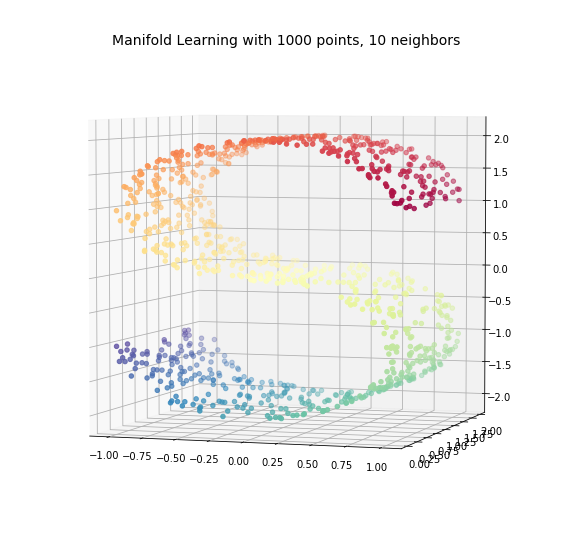

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sklearn.decomposition import PCA

from sklearn import manifold, datasets

from sklearn.utils import check_random_state
import numpy as np

# Next line to silence pyflakes. This import is needed.
Axes3D

n_points = 1000
X, color = datasets.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2

# Create figure
fig = plt.figure(figsize=(10, 10))


# Add 3d scatter plot
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)
ax.set_title("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)
plt.savefig('./S_original_data.png', transparent=True)

In [12]:
X_r, err = manifold.locally_linear_embedding(X, n_neighbors=n_neighbors,
                                             n_components=n_components)

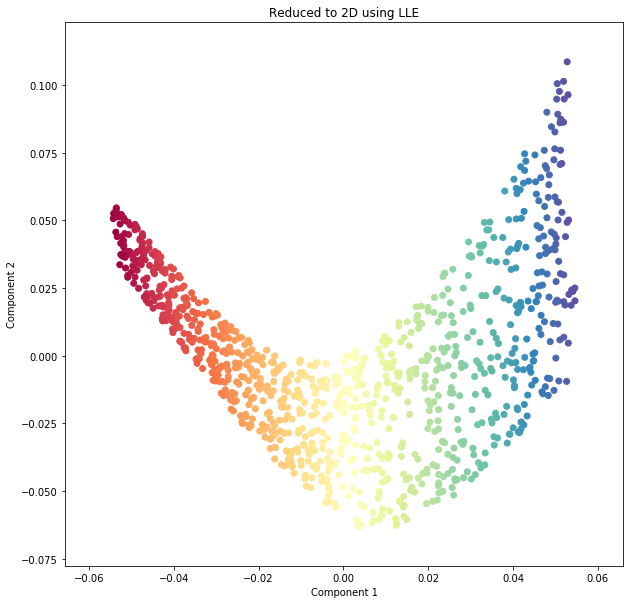

In [13]:
# LLE

# Plot data with dimensionality reduction PCA
fig = plt.figure(figsize=(10, 10))
plt.scatter(X_r[:,0], X_r[:,1], c=color, marker='o', cmap=plt.cm.Spectral)

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Reduced to 2D using LLE')

plt.savefig('./S_LLE_reduce.png', transparent=True)

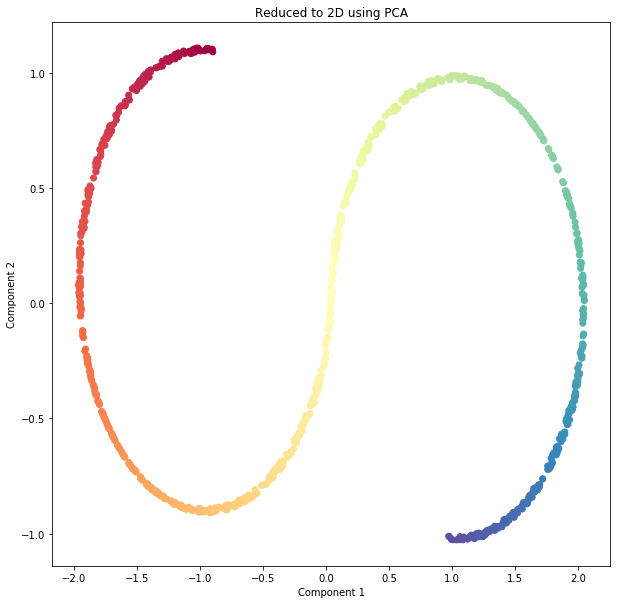

In [16]:
# PCA on 2-dimensions
pca = PCA(n_components=n_components, random_state=111)
pca.fit(X)
pca_X = pca.transform(X)

# Plot data with dimensionality reduction PCA
fig = plt.figure(figsize=(10, 10))
plt.scatter(pca_X[:,0], pca_X[:,1], c=color, marker='o', cmap=plt.cm.Spectral)

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Reduced to 2D using PCA')

plt.savefig('./S_spca_reduce.png', transparent=True)

In [21]:
n_samples = 1000

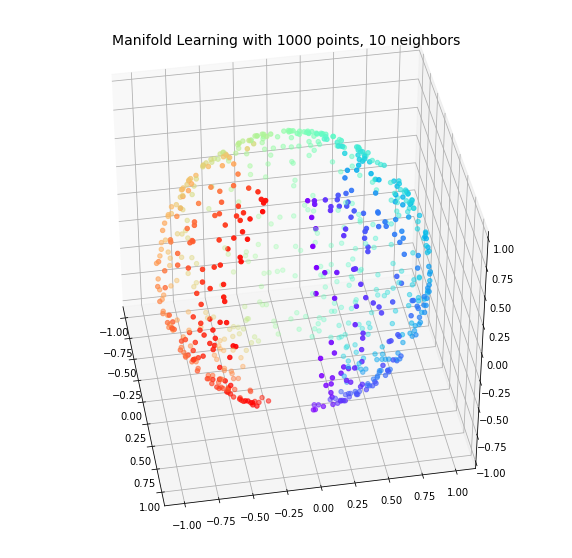

In [27]:
# Create our sphere.
random_state = check_random_state(0)
p = random_state.rand(n_samples) * (2 * np.pi - 0.55)
t = random_state.rand(n_samples) * np.pi

# Sever the poles from the sphere.
indices = ((t < (np.pi - (np.pi / 8))) & (t > ((np.pi / 8))))
colors = p[indices]
x, y, z = np.sin(t[indices]) * np.cos(p[indices]), \
    np.sin(t[indices]) * np.sin(p[indices]), \
    np.cos(t[indices])

# Plot our dataset.
fig = plt.figure(figsize=(10, 10))


ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=p[indices], cmap=plt.cm.rainbow)
ax.view_init(40, -10)
ax.set_title("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)

sphere_data = np.array([x, y, z]).T
plt.savefig('./sphere_original_data.png', transparent=True)

In [32]:
pca_X.shape

(2, 720)

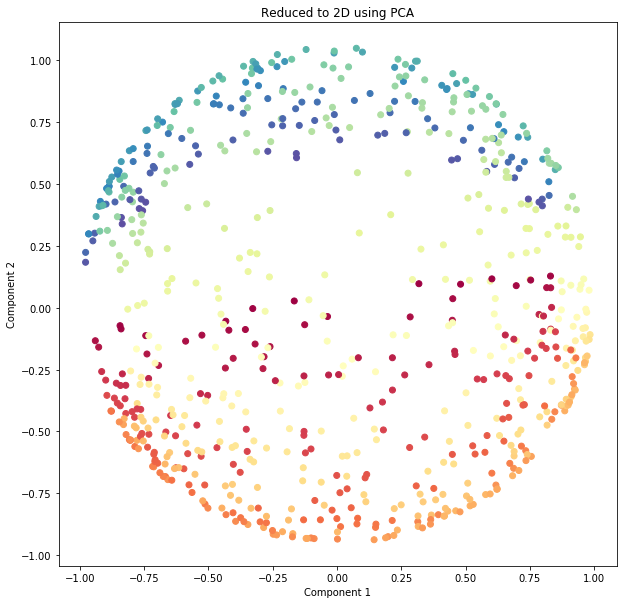

In [35]:
# PCA on 2-dimensions
pca = PCA(n_components=n_components, random_state=111)
pca.fit(sphere_data)
pca_X = pca.transform(sphere_data)

# Plot data with dimensionality reduction PCA
fig = plt.figure(figsize=(10, 10))
plt.scatter(pca_X[:,0], pca_X[:,1], c=colors, marker='o', cmap=plt.cm.Spectral)

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Reduced to 2D using PCA')

plt.savefig('./sphere_spca_reduce.png', transparent=True)

In [36]:
X_r, err = manifold.locally_linear_embedding(sphere_data, n_neighbors=n_neighbors,
                                             n_components=n_components)

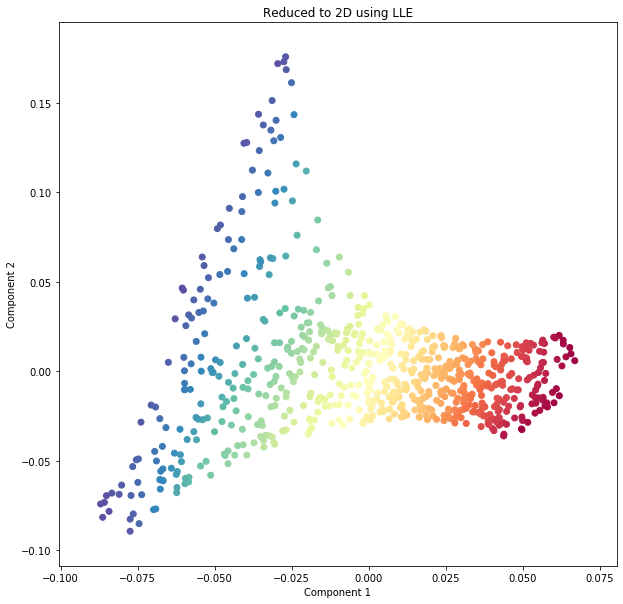

In [37]:
# LLE

# Plot data with dimensionality reduction PCA
fig = plt.figure(figsize=(10, 10))
plt.scatter(X_r[:,0], X_r[:,1], c=colors, marker='o', cmap=plt.cm.Spectral)

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Reduced to 2D using LLE')

plt.savefig('./sphere_LLE_reduce.png', transparent=True)